<h1><center>To Fund or Not to Fund</center></h1>
<h4><center>Using Algorithms to Explore and Predict the success of Funding Campaigns </center></h4>


## Table of Contents

* [Chapter 1](#chapter1): Introduction
    * [Section 1.1](#section_1_1): Problem Statement
    * [Section 1.2](#section_1_2): Research Goal
    * [Section 1.3](#section_1_3): Data Overview
* [Chapter 2](#chapter2): Data Preparation
    * [Section 2.1](#section_2_1): Data Import and Selection
    * [Section 2.2](#section_2_2): Data Cleaning
    * [Section 2.3](#section_2_3): Feature Engineering
    * [Section 2.4](#section_2_4): Display Data
* [Chapter 3](#chapter3): Explanatory Data Analysis
    * [Section 3.1](#section_3_1): Numerical features statistics
    * [Section 3.2](#section_3_2): Festures insights in respect to the target variable
    * [Section 3.3](#section_3_3): Correlations and Feature Extraction
* [Chapter 4](#chapter4): Models
    * [Section 4.1](#section_4_1): Model Exploration
    * [Section 4.2](#section_4_2): Model Fine Tuning
    * [Section 4.3](#section_4_3): Model Testing
* [Chapter 5](#chapter5): Summary
* [Chapter 6](#chapter6): References

# Chapter 1: <a class="anchor" id="chapter1"></a> Introduction

### Section 1.1: <a class="anchor" id="section_1_1"></a> Problem Statement

Crowdfunding has emerged as a primary source of early capital for small firms and start-ups seeking to launch their first concepts. Websites such as Kickstarter enable millions of creators to share their unique ideas with the world. This is a win-win situation in which inventors may raise seed capital while the public has access to cutting-edge prototype items that are not yet accessible on the market.

KickStarter has roughly 6,000 active campaigns at any given time with over 200,000 successfully funded projects since the launched of the platform. However, projects are finding it increasingly difficult to distinguish out from the throng. Of course, advertising distributed through numerous platforms are by far the most significant aspect of a successful campaign. However, for artists with a limited budget, this raises the question, **"How to maximise the likelihood of success of the campaign prior to its launch on the platform?"**

### Section 1.2: <a class="anchor" id="section_1_2"></a> Research Goal

The aim of this report is to support start ups in designing successful campaigns on Kickstarter. Based on data from previous years on the platform, this report aims to provide deeper insights on the potential source of campaign success and to build a prediction model that evaluates wether or not a given campaign will be successful before its launch on the platform.

The analysis as well as the predictions will only be based on the basic information about the campaigns, mainly the launched date, the category of product/concept, the amount requested, and the duration of the campaign.

### Section 1.3: <a class="anchor" id="section_1_3"></a> Data Overview

The data used in this report has been scrapped and gathered by _Webrobots_. Since 2016, this webpage scrawls and provides data in a the form of a dataset once a month. The datasets do not showcase the live campaigns of every month but all the campaigns on the Kickstarter at that point in time. I concatenated 15 datasets provided between 2016 and 2021, showcasing data from 2009 to 2021. 

# Chapter 2: <a class="anchor" id="chapter2"></a> Data Preparation

In [1]:
# Removing warnings
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Importing libraries
import io
from IPython.nbformat import current
with io.open("KickStarter - 3.ipynb", 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
%matplotlib inline
from datetime import datetime
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from numpy import interp
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, auc, average_precision_score, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Display full output in Notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Section 2.1: <a class="anchor" id="section_2_1"></a> Data Import and Selection

#### Data Import

In [3]:
# Importing data
df = pd.read_csv('df.csv')
df.head()

,backers_count,blurb,subcategory,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,goal,id,launched_at,name,pledged,state,state_changed_at,usd_pledged
0,1,Bringing deliciously fresh snacking to every g...,Food Trucks,Food,50,US,1450855441,USD,1453922267,1.000000,25000.0,1124922936,1451330267,Palmetto Pork Skins,50.0,failed,1453922267,50.00000
1,610,Warm hands and full access to your camera dial...,Camera Equipment,Technology,40990,NO,1448279489,NOK,1451336400,0.115908,120000.0,1479488174,1448555978,Photography Gloves: Extend your session in style,355520.0,successful,1451336400,41198.35086
2,11,Enamel pins dedicated to my Grandpa and his di...,Accessories,Fashion,253,US,1571882707,USD,1575075016,1.000000,250.0,2077771673,1572479416,Eat Shit: A Memorial Pin Campaign,253.0,successful,1575075016,253.00000
3,50,"To Rise In Challenge is a brand, lifestyle, me...",Apparel,Fashion,4475,US,1586697917,USD,1604171238,1.000000,4000.0,2008689997,1601579238,TRIC Clothing Co.,4475.0,successful,1604171238,4475.00000
4,442,Inspiring girls & young women. Join me as I cr...,Graphic Design,Design,38821,AU,1468395078,AUD,1472162364,0.758701,50000.0,1113925398,1469483964,Women's Gold Medalists Rio 2016,50899.0,successful,1472162364,38010.56696


#### Data Selection

In [4]:
# Displaying all the columns' names
df.columns

Index(['backers_count', 'blurb', 'subcategory', 'category',
       'converted_pledged_amount', 'country', 'created_at', 'currency',
       'deadline', 'fx_rate', 'goal', 'id', 'launched_at', 'name', 'pledged',
       'state', 'state_changed_at', 'usd_pledged'],
      dtype='object')

In respect to our problem framing, it is sensible to drop the amount pledged (and all the features based on it, e.g. 'usd_pledged','converted_pledged_amount') as well as the 'state_change_at' column since they is a direct indicator of whether a campaign will be successful or not. We will also drop the feature 'created_at', which is not really relevant here because it simply indicates when the campaignwas registered on Kickstarter in contrast to when it was launched.

In [5]:
# Dropping irrelevant column
df = df.drop(['pledged',
              'usd_pledged',
              'converted_pledged_amount',
              'backers_count',
              'state_changed_at',
              'created_at'], axis = 1)

### Section 2.2: <a class="anchor" id="section_2_2"></a> Data Cleaning

**Dropping with duplicated rows**

In [6]:
# Check for number of duplicated rows in each columns
df[df.duplicated()].count()

blurb          33383
subcategory    33383
category       33383
country        33383
currency       33383
deadline       33383
fx_rate        33383
goal           33383
id             33383
launched_at    33383
name           33383
state          33383
dtype: int64

In [7]:
# Check for the content of duplicated rows
pd.options.display.max_columns = None
df[df.duplicated(keep=False)].sort_values('id')

,blurb,subcategory,category,country,currency,deadline,fx_rate,goal,id,launched_at,name,state
1287,I will create short videos from 15 sec to 30 m...,Family,Film & Video,CA,CAD,1610427014,0.785821,5000.0,148828,1607835014,Grow up a family YouTube channel,live
13803,I will create short videos from 15 sec to 30 m...,Family,Film & Video,CA,CAD,1610427014,0.785821,5000.0,148828,1607835014,Grow up a family YouTube channel,live
45945,A Limited Edition coffee table book of epic Je...,Photobooks,Photography,US,USD,1554049087,1.000000,20000.0,325875,1551460687,Just Jerry : Jerry Garcia Photographed by Bob ...,successful
91897,A Limited Edition coffee table book of epic Je...,Photobooks,Photography,US,USD,1554049087,1.000000,20000.0,325875,1551460687,Just Jerry : Jerry Garcia Photographed by Bob ...,successful
95611,The next phase and evolution of Surreal ValeCi...,Web,Journalism,US,USD,1523472008,1.000000,2500.0,377517,1520880008,New definition of media: Evolving a Surreal Va...,failed
...,...,...,...,...,...,...,...,...,...,...,...,...
67768,Help Never Say Die bring their new full length...,Punk,Music,US,USD,1590764399,1.000000,500.0,2147358637,1588172399,Never Say Die's 3rd album Punk Rock Pirates,successful
232529,Help Never Say Die bring their new full length...,Punk,Music,US,USD,1590764399,1.000000,500.0,2147358637,1588172399,Never Say Die's 3rd album Punk Rock Pirates,successful
172855,Help Never Say Die bring their new full length...,Punk,Music,US,USD,1590764399,1.000000,500.0,2147358637,1588172399,Never Say Die's 3rd album Punk Rock Pirates,successful
214560,New reinforcements for Punkapocalyptic or just...,Tabletop Games,Games,ES,EUR,1602604802,1.216478,10000.0,2147405101,1601395202,Punkapocalyptic. Masters of the Wasteland,successful


More than 33,000 rows have duplicates, this is due to the webscraping of several weeks everlapping that I aggregated in one dataset. 

In [8]:
# Dropping the duplicates
df = df.drop_duplicates(keep=False)

# Checking null values
df[df.isnull().any(axis=1)].count()

blurb          0
subcategory    8
category       8
country        8
currency       8
deadline       8
fx_rate        8
goal           8
id             8
launched_at    8
name           8
state          8
dtype: int64

In [9]:
# Checking the the rows with null values
df[df.isnull().any(axis=1)]

,blurb,subcategory,category,country,currency,deadline,fx_rate,goal,id,launched_at,name,state
3375,NaN,Spaces,Theater,US,USD,1452142672,1.000000,1500000.0,272079457,1449550672,N/A (Canceled),canceled
6284,NaN,Printing,Crafts,US,USD,1408334400,1.000000,100.0,233547398,1407441222,Vending Machine (Canceled),canceled
19019,NaN,Conceptual Art,Art,US,USD,1427901540,1.000000,100000.0,1879498871,1424210815,N/A (Canceled),canceled
40955,NaN,Conceptual Art,Art,US,USD,1335042707,1.000000,50000.0,1224405542,1331158307,N/A (Canceled),canceled
78274,NaN,Food Trucks,Food,US,USD,1475959978,1.000000,15000.0,899643147,1473367978,N/A (Canceled),canceled
98849,NaN,Sound,Technology,GB,GBP,1446209511,1.354034,60000.0,626888806,1443617511,Star Wars Bluetooth Speakers (Canceled),canceled
133232,NaN,Digital Art,Art,US,USD,1515800048,1.000000,40000.0,1077399482,1510616048,awlsies,failed
163070,NaN,Ready-to-wear,Fashion,DE,EUR,1507625188,1.222525,15000.0,937524480,1505033188,Ready to wear,failed


In [10]:
# Dropping the 8 rows with null values
df = df.dropna()

# Checking if we don't have any null values anymore
df[df.isnull().any(axis=1)].count()

blurb          0
subcategory    0
category       0
country        0
currency       0
deadline       0
fx_rate        0
goal           0
id             0
launched_at    0
name           0
state          0
dtype: int64

**Renaming columns:**

In [11]:
column_names = {"blurb":"description",
         "subcategory":"subcategory",
         "category":"category", 
         "country":"country", 
         "currency":"currency", 
         "deadline":"deadline", 
         "fx_rate":"fix_rate", 
         "goal":"goal", 
         "id":"id", 
         "launched_at":"launched_date", 
         "name":"name"}

df = df.rename(mapper = column_names, axis = 1)

df.head(3)

,description,subcategory,category,country,currency,deadline,fix_rate,goal,id,launched_date,name,state
0,Bringing deliciously fresh snacking to every g...,Food Trucks,Food,US,USD,1453922267,1.000000,25000.0,1124922936,1451330267,Palmetto Pork Skins,failed
1,Warm hands and full access to your camera dial...,Camera Equipment,Technology,NO,NOK,1451336400,0.115908,120000.0,1479488174,1448555978,Photography Gloves: Extend your session in style,successful
4,Inspiring girls & young women. Join me as I cr...,Graphic Design,Design,AU,AUD,1472162364,0.758701,50000.0,1113925398,1469483964,Women's Gold Medalists Rio 2016,successful


### Section 2.3: <a class="anchor" id="section_2_3"></a> Feature Engineering

In this section, we will change the nature of some of the columns as well as include new features in order to better prepare our data for, in the first part, understanding the cause of successful campaigns and, in a second part, feeding the models with qualitative data.

In [12]:
# Overview of the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177140 entries, 0 to 241046
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   description    177140 non-null  object 
 1   subcategory    177140 non-null  object 
 2   category       177140 non-null  object 
 3   country        177140 non-null  object 
 4   currency       177140 non-null  object 
 5   deadline       177140 non-null  int64  
 6   fix_rate       177140 non-null  float64
 7   goal           177140 non-null  float64
 8   id             177140 non-null  int64  
 9   launched_date  177140 non-null  int64  
 10  name           177140 non-null  object 
 11  state          177140 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 17.6+ MB


In [13]:
# Converting date features to a datetime format
date_col = ['launched_date','deadline']

for i in date_col:
    df[i] = df[i].apply(lambda x: datetime.fromtimestamp(int(x)).strftime("%Y-%m-%d"))
    
df['launched_date'] = pd.to_datetime(df['launched_date'], format="%Y-%m-%d", infer_datetime_format=True, errors='coerce')
df['deadline'] = pd.to_datetime(df['deadline'], format="%Y-%m-%d", infer_datetime_format=True, errors='coerce')

In [14]:
# Checking the number of categories in each categorical column
print('number of categories in category: '+ str(df['category'].nunique()))
print('number of categories in subcategory: ' + str(df['subcategory'].nunique()))
print('number of categories in country: ' + str(df['country'].nunique()))
print('number of categories in state: ' + str(df['state'].nunique()))

number of categories in category: 15
number of categories in subcategory: 159
number of categories in country: 25
number of categories in state: 4


In [15]:
# Checking value consistency in categorical column
print('Category: \n', df['category'].unique(), "\n")
print('Subcategory: \n', df['subcategory'].unique(), "\n")
print('Currency: \n', df['currency'].unique(), "\n")        
print('Country: \n', df['country'].unique(), "\n")
print('State: \n', df['state'].unique(), "\n")

Category: 
 ['Food' 'Technology' 'Design' 'Music' 'Crafts' 'Photography' 'Fashion'
 'Comics' 'Dance' 'Theater' 'Film & Video' 'Publishing' 'Journalism'
 'Games' 'Art'] 

Subcategory: 
 ['Food Trucks' 'Camera Equipment' 'Graphic Design' 'Apps' 'Rock'
 'Stationery' 'Nature' 'Crochet' 'World Music' 'Cookbooks' 'Accessories'
 'Graphic Novels' 'Spaces' 'Fine Art' 'Plays' 'Festivals' 'Immersive'
 'Experimental' 'Software' 'Apparel' 'Design' 'Metal' 'Fashion' 'Bacon'
 'R&B' 'Webseries' 'Interactive Design' 'Academic' 'DIY Electronics'
 'Calendars' 'Web' 'Mobile Games' 'Classical Music' 'Playing Cards'
 'Gadgets' '3D Printing' 'Theater' 'Food' 'Narrative Film'
 'Radio & Podcasts' 'Farms' 'Zines' 'Vegan' 'Events' 'Jewelry' 'Animation'
 'Public Art' 'Art Books' 'Romance' 'Technology' 'Musical' 'Anthologies'
 'Documentary' 'Textiles' 'People' 'Space Exploration' 'Knitting' 'Flight'
 'Puzzles' 'Sound' 'Comedy' 'Audio' 'Typography' 'Hardware' 'Footwear'
 'Print' 'Robots' 'Shorts' 'Wearables' 'Fabri

In [16]:
# Dropping campaigns that are neither successful nor failed as, in this analysis, 
# we are only interested in those 2 outcomes
df = df[df['state']!='live']
df = df[df['state']!='canceled']

In [17]:
# Converting state type into a boolean type in order to use the data more easily when plotting graphs and
# more importantly, for the models to interpret the variable in a more digest way
df['state'] = df['state'].replace({'successful':1, 'failed':0})
df['state'] = df['state'].astype(int)
df['state'].dtype

dtype('int64')

In [18]:
# Creating a new feature with the difference in weeks between launch date and deadline
df['duration'] = ((df['deadline'] - df['launched_date']).dt.days)//7

In [19]:
# Converting goal in USD for each campaign
df['goal_usd'] = df['goal'] * df['fix_rate']
df = df.drop(['goal','fix_rate'],axis=1)
df = df.rename(columns={'goal_usd': 'goal'})

In [20]:
# Converting the launched date into a categorical feature by splitting them into day, month and year columns
df["launched_day"] = df['launched_date'].map(lambda x: x.day)
df["launched_month"] = df['launched_date'].map(lambda x: x.month)
df["launched_year"] = df['launched_date'].map(lambda x: x.year)

In [21]:
# Creating two new columns based on the length of the campaign's name and description
df['name_length'] = df['name'].str.len()
df['description_length'] = df['description'].str.len()

### Section 2.4: <a class="anchor" id="section_2_4"></a> Display Data

In [22]:
# Displaying the dataframe used for visualisations
df.head()
df.info()

,description,subcategory,category,country,currency,deadline,id,launched_date,name,state,duration,goal,launched_day,launched_month,launched_year,name_length,description_length
0,Bringing deliciously fresh snacking to every g...,Food Trucks,Food,US,USD,2016-01-27,1124922936,2015-12-28,Palmetto Pork Skins,0,4,25000.0000,28,12,2015,19,109
1,Warm hands and full access to your camera dial...,Camera Equipment,Technology,NO,NOK,2015-12-28,1479488174,2015-11-26,Photography Gloves: Extend your session in style,1,4,13908.9960,26,11,2015,48,123
4,Inspiring girls & young women. Join me as I cr...,Graphic Design,Design,AU,AUD,2016-08-25,1113925398,2016-07-25,Women's Gold Medalists Rio 2016,1,4,37935.0295,25,7,2016,31,133
6,Una aplicación para que el usuario organice di...,Apps,Technology,MX,MXN,2020-10-22,2045143632,2020-09-07,FUNDAY,0,6,4037.1552,7,9,2020,6,120
9,Wooden HEZ is going on a tour of the Deep Sout...,Rock,Music,US,USD,2013-04-13,1789057014,2013-03-14,Wooden HEZ's Southern HEZpitality Tour 2013,1,4,600.0000,14,3,2013,43,113


<class 'pandas.core.frame.DataFrame'>
Int64Index: 165728 entries, 0 to 241046
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   description         165728 non-null  object        
 1   subcategory         165728 non-null  object        
 2   category            165728 non-null  object        
 3   country             165728 non-null  object        
 4   currency            165728 non-null  object        
 5   deadline            165728 non-null  datetime64[ns]
 6   id                  165728 non-null  int64         
 7   launched_date       165728 non-null  datetime64[ns]
 8   name                165728 non-null  object        
 9   state               165728 non-null  int64         
 10  duration            165728 non-null  int64         
 11  goal                165728 non-null  float64       
 12  launched_day        165728 non-null  int64         
 13  launched_month      165728 no

# Chapter 3: <a class="anchor" id="chapter3"></a> Explanatory Data Analysis

### Section 3.1: <a class="anchor" id="section_3_1"></a> Numerical features statistics

**Checking outliers in numerical columns**

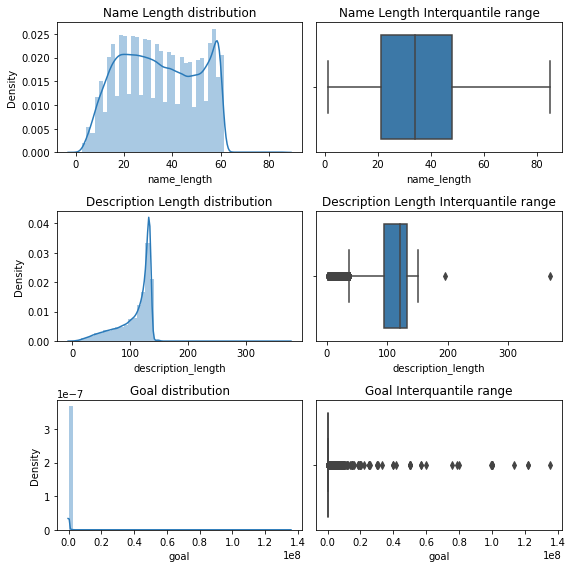

In [25]:
# Setting the figure
plt.figure(figsize=(8,8))

# Subplots for the statistics of name_length
plt.subplot(3,2,1)
sns.distplot(df['name_length'],color='#2A7AB9')
plt.title('Name Length distribution')
plt.subplot(3,2,2)
sns.boxplot(df['name_length'],color='#2A7AB9')
plt.title('Name Length Interquantile range')

# Subplots for the statistics of description_length
plt.subplot(3,2,3)
sns.distplot(df['description_length'],color='#2A7AB9')
plt.title('Description Length distribution')
plt.subplot(3,2,4)
sns.boxplot(df['description_length'],color='#2A7AB9')
plt.title('Description Length Interquantile range')

# Subplots for the statistics of goal
plt.subplot(3,2,5)
sns.distplot(df['goal'],color='#2A7AB9')
plt.title('Goal distribution')
plt.subplot(3,2,6)
sns.boxplot(df['goal'],color='#2A7AB9')
plt.title('Goal Interquantile range')
plt.tight_layout()
plt.show();

**Outliers statistics:**

In [26]:
# Calculating boundary values for numerical features
name_length_upper_limit = df['name_length'].mean() + 3*df['name_length'].std()
name_length_lower_limit = df['name_length'].mean() - 3*df['name_length'].std()

description_length_upper_limit = df['description_length'].mean() + 3*df['description_length'].std()
description_length_lower_limit = df['description_length'].mean() - 3*df['description_length'].std()

goal_upper_limit = df['goal'].mean() + 3*df['goal'].std()
goal_lower_limit = df['goal'].mean() - 3*df['goal'].std()

# Finding number of outliers of duration and description_length
print('Number of name_length outliers:')
df[(df['name_length'] > name_length_upper_limit) | (df['name_length'] < name_length_lower_limit)]['id'].count()
print('Number of description_length outliers:')
df[(df['description_length'] > description_length_upper_limit) | (df['description_length'] < description_length_lower_limit)]['id'].count()
print('Number of goal outliers:')
df[(df['goal'] > goal_upper_limit) | (df['goal'] < goal_lower_limit)]['id'].count()

Number of name_length outliers:


50

Number of description_length outliers:


1137

Number of goal outliers:


155

In [27]:
# Checking the description_length outliers
df[(df['description_length'] > description_length_upper_limit) | (df['description_length'] < description_length_lower_limit)].head(5)

,description,subcategory,category,country,currency,deadline,id,launched_date,name,state,duration,goal,launched_day,launched_month,launched_year,name_length,description_length
31,Conscious musicians,World Music,Music,US,USD,2013-01-30,1689659975,2012-12-31,Planting The Seeds,0,4,10000.000000,31,12,2012,18,19
709,Do Good. Feel Better,Apps,Technology,CA,CAD,2020-08-06,1921383602,2020-07-02,Good Deeds: 100% Free Web & Mobile Sharing App,0,5,53551.060884,2,7,2020,46,20
975,Fortunate the movie,Romance,Film & Video,US,USD,2015-10-11,1532778027,2015-08-31,FORTUNATE,0,5,10000.000000,31,8,2015,9,19
984,Tiling Puzzle,Puzzles,Games,AU,AUD,2019-03-08,893084987,2019-01-07,MindSharp,0,8,45522.035400,7,1,2019,9,13
1120,NOW!,Puzzles,Games,GB,GBP,2015-10-16,1184885399,2015-09-16,Ganjanapoli: Automatic for the pigeon,1,4,18.956473,16,9,2015,37,4



It seems like the main part have a very small description. But again, they do not seem to be computation mistakes so we can keep them as they are.

In [28]:
# Checking the goal outliers
df[(df['goal'] > goal_upper_limit) | (df['goal'] < goal_lower_limit)].head()

,description,subcategory,category,country,currency,deadline,id,launched_date,name,state,duration,goal,launched_day,launched_month,launched_year,name_length,description_length
4149,I want this city to advance the future in an o...,Robots,Technology,US,USD,2015-06-12,725167743,2015-04-13,Buy Valle Piola,0,8,5.000000e+06,13,4,2015,15,93
4208,7th Leadership Organization a organization tha...,Robots,Technology,US,USD,2015-09-23,6538220,2015-08-24,Construction of Gundam 01,0,4,2.500000e+07,24,8,2015,25,134
5252,The Presidential Yacht Williamsburg is rusting...,Public Art,Art,US,USD,2015-10-27,1656648684,2015-09-27,Save the Williamsburg,0,4,4.000000e+07,27,9,2015,21,125
8550,"My wife Andrea and I, Michael Kammerhofer want...",Restaurants,Food,CH,CHF,2015-10-05,219702078,2015-08-06,Kitchen from Austria in Switzerland,0,8,1.129614e+08,6,8,2015,35,132
9297,Dream of a farm where the food grown is GIVEN ...,Farms,Food,AU,AUD,2014-12-08,997671931,2014-11-24,Food for FREE,0,2,3.403349e+06,24,11,2014,13,111


The figures for the goal outliers seem very extreme. Some of them seem to be computation mistakes (e.g. "A cookbook full of grandmas favorite dishes!" with a goal of $5000000.0. As a result, they might mislead the models later on. In this case, we will drop these columns.

In [30]:
# Getting rid of goal outliers
df = df[(df['goal'] < goal_upper_limit) & (df['goal'] > goal_lower_limit)]

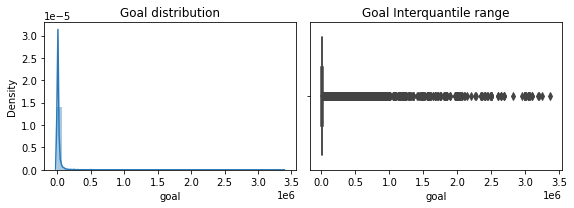

In [31]:
# Setting the figure
plt.figure(figsize=(8,3))

# Checking the shape of the goal feature
plt.subplot(1,2,1)
sns.distplot(df['goal'],color='#2A7AB9')
plt.title('Goal distribution')
plt.subplot(1,2,2)
sns.boxplot(df['goal'],color='#2A7AB9')
plt.title('Goal Interquantile range')
plt.tight_layout()
plt.show();

The goal feature still looks very skewed. This issue could be solved by taking the log of the feature. 

In [32]:
# Creating a log version of the goal
df['log_goal'] = np.log10(df['goal'])

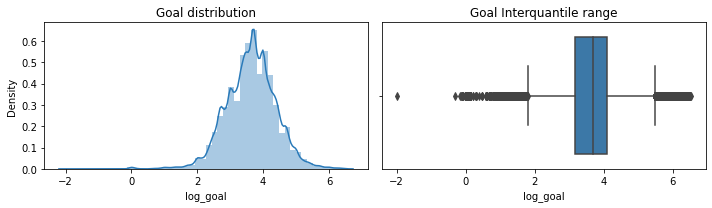

In [34]:
# Setting the figure
plt.figure(figsize=(10,3))

# Rechecking the shape of the goal feature
plt.subplot(1,2,1)
sns.distplot(df['log_goal'],color='#2A7AB9')
plt.title('Goal distribution')
plt.subplot(1,2,2)
sns.boxplot(df['log_goal'],color='#2A7AB9')
plt.title('Goal Interquantile range')
plt.tight_layout()
plt.show();

### Section 3.2: <a class="anchor" id="section_3_2"></a> Festures insights in respect to the target variable

**Timeframe**

In [35]:
# Displaying time data on a quaterly basis to be able to plot the number of campaigns launched over time
df['launched_date_quarter'] = pd.PeriodIndex(df.launched_date, freq='Q')

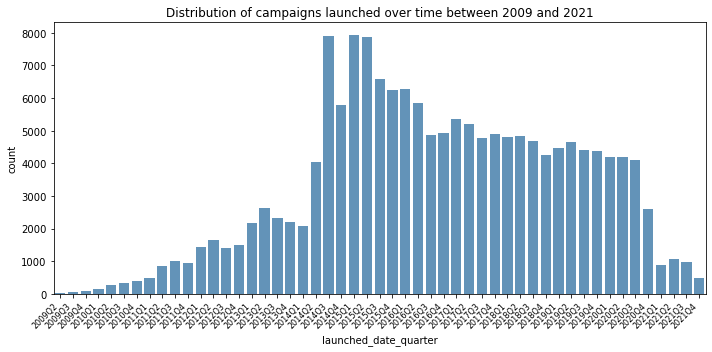

In [36]:
# Setting the figure
plt.figure(figsize=(10,5))

sns.countplot(data=df.sort_values('launched_date_quarter'),x='launched_date_quarter',color='#2A7AB9',alpha=0.8)
plt.xticks(rotation=45,ha='right',fontsize=8)
plt.title("Distribution of campaigns launched over time between 2009 and 2021")
plt.tight_layout()
plt.show();

The distribution is not even throughout the years. This is due to the sample I fetched, which is not very poor for the period before 2014 and after 2020. Let's focus our analysis on a reliable timeframe : between Q2 2014 and Q4 2020.

In [37]:
# Creating new dataframe with the reliable timeframe
start_date = '2014-06-01'
end_date = '2020-11-21'
new_df = df[(df['launched_date'] > start_date) & (df['launched_date'] <= end_date)]

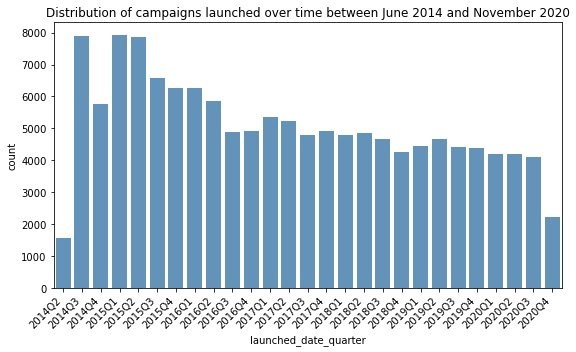

In [38]:
# Plotting the new dataframe
plt.figure(figsize=(8,5))

sns.countplot(data=new_df.sort_values('launched_date_quarter'),x='launched_date_quarter',color='#2A7AB9',alpha=0.8)
plt.xticks(rotation=45,ha='right')
plt.title("Distribution of campaigns launched over time between June 2014 and November 2020")
plt.tight_layout()
plt.show();

In [39]:
# Redefining the new dataframe
df = new_df

<Figure size 432x288 with 0 Axes>

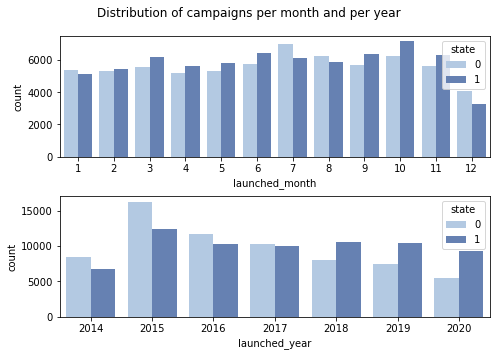

In [40]:
# Plotting the distribution of campaigns per months and years
fig=plt.figure()
figure, axes = plt.subplots(nrows=2,figsize=(7,5))
sns.countplot(x='launched_month',data=df, hue='state', palette=['#ABC9EA','#597DBF'], ax = axes[0])
sns.countplot(x='launched_year',data=df, hue='state', palette=['#ABC9EA','#597DBF'], ax = axes[1])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Distribution of campaigns per month and per year')
plt.show();

The proportion of succesful campaigns does not vary a lot depending on the month.
And over the years, we can see that the proportion of successful campaigns increases while the proportion of failed campaigns declines. So in this case, since the distribution of both states over the year is opposite, 'launched_year' might be a critical feature for our models.

**Goal**

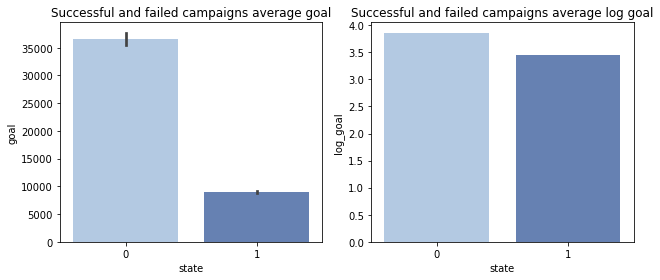

In [41]:
# Implementing a figure
plt.figure(figsize=(9,4))

# Plotting the goal in respect to the target variable
plt.subplot(1,2,1)
plt.title("Successful and failed campaigns average goal")
sns.barplot(data=df, x="state", y="goal",palette=['#ABC9EA','#597DBF'])

# Plotting the log of the goal in respect to the target variable
plt.subplot(1,2,2)
plt.title("Successful and failed campaigns average log goal")
sns.barplot(data=df, x="state", y="log_goal",palette=['#ABC9EA','#597DBF'])

plt.tight_layout()
plt.show();

By relying on the goal and the log of the goal (which penalises extreme values), we can see that successful campaigns have a lower goal than failed campaigns.

**Categories & Subcategories**

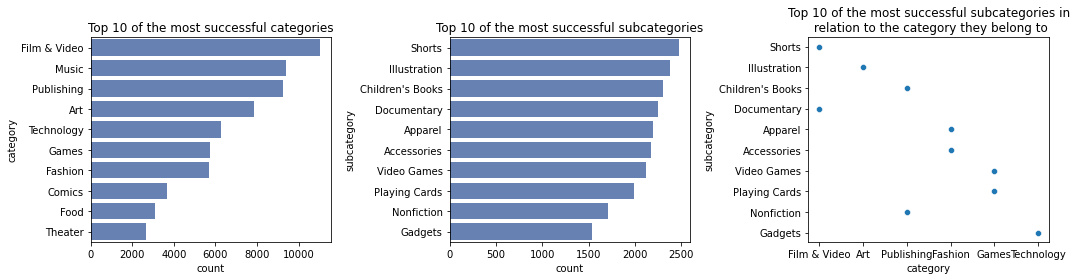

In [42]:
# Creating a dataframe with successful campaigns only
successful_df = df[df['state']==1]

# Top 10 of the most successful categories based on the number of campaigns
top_cat = pd.DataFrame(successful_df.groupby(['category'])['id'].count().sort_values(ascending=False)).head(10)

# Top 10 of the most successful subcategories based on the number of campaigns
top_subcat = pd.DataFrame(successful_df.groupby(['subcategory'])['id'].count().sort_values(ascending=False)).head(10)

# Top 10 of the most successful subcategories and the category they are assigned to
top_subcat_cat = pd.DataFrame(successful_df.groupby(['subcategory','category'])['id'].count().sort_values(ascending=False)).head(10)
top_subcat_cat = top_subcat_cat.reset_index()

# Implementing a figure
plt.figure(figsize=(15,4))

# Plotting top 10 most successful categories
plt.subplot(1,3,1)
plt.title("Top 10 of the most successful categories")
ax = sns.barplot(y=top_cat.index,x=top_cat.id,color="#597DBF",)
ax.set_xlabel('count')

# Plotting top 10 most successful subcategories
plt.subplot(1,3,2)
plt.title("Top 10 of the most successful subcategories")
ax = sns.barplot(y=top_subcat.index,x=top_subcat.id,color="#597DBF")
ax.set_xlabel('count')

# Plotting top 10 most successful subcategories in relation to the category they are part of
plt.subplot(1,3,3)
plt.title("Top 10 of the most successful subcategories in\n relation to the category they belong to")
sns.scatterplot(data=top_subcat_cat,x='category',y='subcategory')

plt.tight_layout()
plt.show();

We can see that the top most successful subcategories belong to the top categories. As a result, there is a positive relationship between these two features together and the success of a campaign. This could potentially help the models to identify successful campaigns.

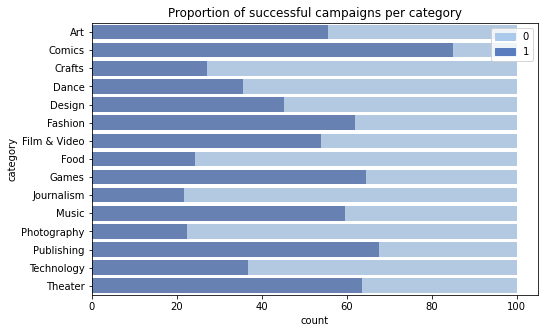

In [43]:
# set the figure size
plt.figure(figsize=(8, 5))

# from raw value to percentage
total_cat = df.groupby('category')['id'].count().reset_index()
success = df[df.state==1].groupby('category')['id'].count().reset_index()
success['id'] = [i / j * 100 for i,j in zip(success['id'], total_cat['id'])]
total_cat['id'] = [i / j * 100 for i,j in zip(total_cat['id'], total_cat['id'])]

# bar chart 1 -> top bars (group of 'failed')
bar1 = sns.barplot(y="category",  x="id", data=total_cat, color='#ABC9EA')
bar1.set_xlabel('count')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(y="category", x="id", data=success, color='#597DBF')
bar2.set_xlabel('count')

# add legend
top_bar = mpatches.Patch(color='#ABC9EA', label=0)
bottom_bar = mpatches.Patch(color='#597DBF', label=1)
plt.legend(handles=[top_bar, bottom_bar])

# add title
plt.title('Proportion of successful campaigns per category')

# show the graph
plt.show();

Although, as seen on the previous graph, the most successful categories in number of campaigns are Film&Video, Music, Publishing and Art, the category with the highest success rate is Comics. As a comparison, the big majority of successful campaigns are Films & Videos but the success rate is mediocre.

**Duration**

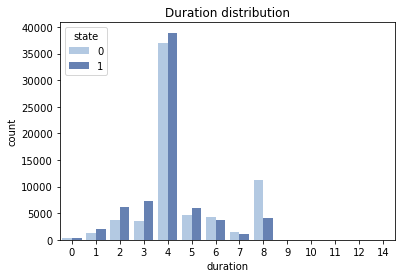

In [44]:
# Plotting the duration distribution
sns.countplot(x='duration',data=df, hue='state', palette=['#ABC9EA','#597DBF'])
plt.title('Duration distribution')
plt.show();

The majority of the campaigns last 4 weeks and while the proportion of successful campaigns are pretty even for each duration, it is not the case for campaigns that last 8 weeks, where there is a higher proportion of failed campaigns than successful campaigns.

**Country & Currency**

<Figure size 432x288 with 0 Axes>

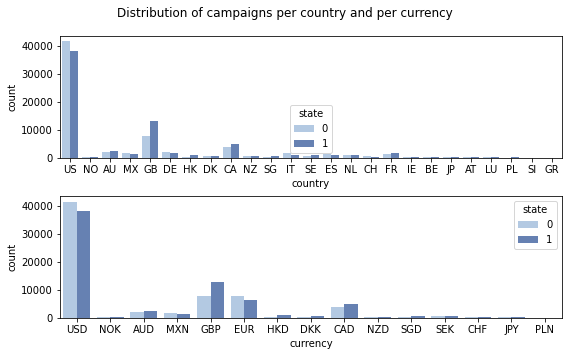

In [45]:
# Plotting the distribution of campaigns per months and years
fig=plt.figure()
figure, axes = plt.subplots(nrows=2,figsize=(8,5))
sns.countplot(x='country',data=df, hue='state', palette=['#ABC9EA','#597DBF'], ax = axes[0])
sns.countplot(x='currency',data=df, hue='state', palette=['#ABC9EA','#597DBF'], ax = axes[1])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Distribution of campaigns per country and per currency')
plt.show();

As expected, country and currency show very similar distributions, meaning that they are probably highly correlated (we will verify this statement when we will come to the heat map at the end of the chapter).
Moreover, while there is a disproportionate number of campaigns coming from the US, the proportion of successful campaigns is pretty even accross countries & currencies. Hence, both currency and country might have a low importance for the models.

### Section 3.3: <a class="anchor" id="section_3_3"></a> Correlations and Feature extraction

**Heatmap of the correlation matrix**

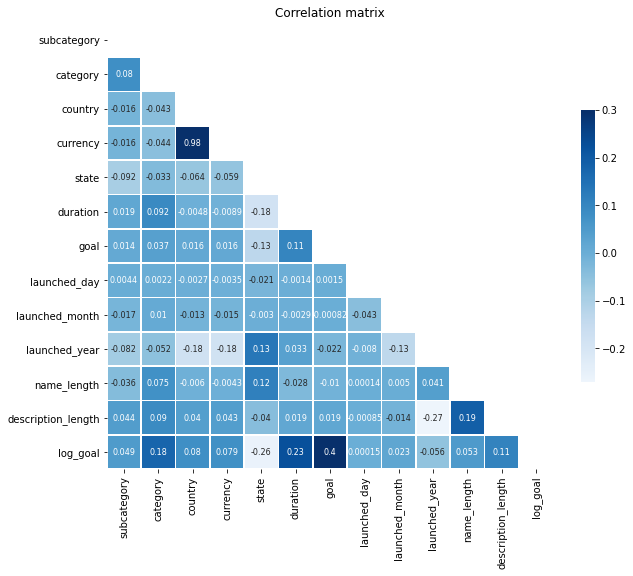

In [46]:
# Creating a new dataframe to use a LabelEncoder for categorical values without changing the original dataset
df_2 = df.copy().drop('id',axis=1)

le = preprocessing.LabelEncoder()
objects = ["category","subcategory","currency","state","country","launched_year"]
for i in objects:  
    df_2[i] = le.fit_transform(df_2[i])

corr = df_2.corr()

# Keeping only the lower left triangle of the heatmap
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plotting the heatmap of numerical and categorical features
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, mask=mask, cmap='Blues', vmax=.3, center=0,square=True, linewidths=.5, 
            cbar_kws={"shrink": .5},annot_kws={'size': 8})
plt.title('Correlation matrix')
plt.show();

Overall, the correlations between features are weak. However, the heatmap shows a negative relationship between the state and the log_goal of 26%, which echos with what we saw in the previous section when comparing the goal 7 log goal of successful and failed campaigns.

**Feature extraction**

Final dataframe - used for the modelling

In [47]:
df = df[['name_length','description_length','state','launched_day','launched_month','launched_year',
         'duration','goal','category','subcategory','country']]

Note that we are not keeping currency as it is too correlated with country and does not bring significant information to the model. And we are not using the log of the goal in the models since the goal will be scaled during the modelling process.

# Chapter 4: <a class="anchor" id="chapter4"></a> Models

#### Pre-processing

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Selecting categorical columns
categorical_cols = ["category","subcategory","country","launched_day","launched_month","launched_year"]
# Selecting numerical columns
numerical_cols = ["duration","goal","name_length","description_length"]

# Preprocessing for categorical data
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Preprocessing for numerical data
sc = StandardScaler()

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', sc, numerical_cols),
        ('cat', encoder, categorical_cols)
    ])

#### Splitting the data

We will use a train, validation, test split.
- The train set will be used to train the different models. 
- The validation set, in the first phase, will be used to provide an evaluation of each model with a Validation score which will enable us to choose the best performing model. In the second phase, it will be used to tune the hyperparameters of the model.
- The test set will be used to provide an unbiased evaluation of the best final model.

Note that we are not using cross validation during the first phase in order to be more time efficient since we are testing multiple models. However, we will be using cross validation for the second phase in case some models overfit the training data.

In [6]:
# Setting feature variable and target variable
X = df.drop('state',axis=1)
y = df['state']

In [7]:
# Defining ratios
ratio_train = 0.8
ratio_val = 0.1
ratio_test = 0.1

# Creating test split
X_remaining, X_test, y_remaining, y_test = train_test_split(X, y, test_size=ratio_test, random_state=1)

# Adjusting validation ratio (remaining dataset)
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Creating train and validations splits
X_train, X_val, y_train, y_val = train_test_split(X_remaining, y_remaining, test_size=ratio_val_adjusted, random_state=1)

### Section 4.1: <a class="anchor" id="section_4_1"></a> Stage 1 - Model exploration

In this section, we will use our training set to train different models (with standard parameters) and assess their performance with a validation set.

#### Model 1 - Logistic regression

In [49]:
# Setting the parameters of the model and fitting in to the train set
logmodel = LogisticRegression(solver='lbfgs',max_iter=500)
log = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', logmodel)
])
log.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration', 'goal',
                                                   'name_length',
                                                   'description_length']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['category', 'subcategory',
                                                   'country', 'launched_day',
                                                   'launched_month',
                                                   'launched_year'])])),
                ('model', LogisticRegression(max_iter=500))])

In [50]:
# Measuring accuracy of the model with the training score and the validation score
log_train_pred = log.predict(X_train)
log_val_pred = log.predict(X_val)

score = sklearn.metrics.accuracy_score(y_train,log_train_pred)
print('Training score: ' + str(score))

score = sklearn.metrics.accuracy_score(y_val,log_val_pred)
print('Validation score: ' + str(score))

Training score: 0.784329085559695
Validation score: 0.788035558146313


In [326]:
# Confusion matrix of the model on the validation set
print('Confusion matrix: \n')
print(confusion_matrix(y_val,log_val_pred))

Confusion matrix: 

[[5757 1033]
 [1876 5058]]


In [327]:
# Classification report of the model on the validation set
print('Classification report: \n')
print(classification_report(y_val,log_val_pred))

Classification report: 

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      6790
           1       0.83      0.73      0.78      6934

    accuracy                           0.79     13724
   macro avg       0.79      0.79      0.79     13724
weighted avg       0.79      0.79      0.79     13724



#### Model 2: SVM

In [346]:
# Setting up of the SVM model
svcmodel = SVC()
svc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', svcmodel)
])

svc.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration', 'goal',
                                                   'name_length',
                                                   'description_length']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['category', 'subcategory',
                                                   'country', 'launched_day',
                                                   'launched_month',
                                                   'launched_year'])])),
                ('model', SVC())])

In [347]:
# Measuring accuracy of the model with the training score and the validation score
svc_train_pred = svc.predict(X_train)
svc_val_pred = svc.predict(X_val)

score = sklearn.metrics.accuracy_score(y_train,svc_train_pred)
print('Training score: ' + str(score))

score = sklearn.metrics.accuracy_score(y_val,svc_val_pred)
print('Validation score: ' + str(score))

Training score: 0.8417241285080568
Validation score: 0.8149227630428446


In [348]:
# Confusion matrix of the model on the validation set
print('Confusion matrix: \n')
print(confusion_matrix(y_val,svc_val_pred))

Confusion matrix: 

[[5973  817]
 [1723 5211]]


In [349]:
# Classification report of the model on the validation set
print('Classification report: \n')
print(classification_report(y_val,svc_val_pred))

Classification report: 

              precision    recall  f1-score   support

           0       0.78      0.88      0.82      6790
           1       0.86      0.75      0.80      6934

    accuracy                           0.81     13724
   macro avg       0.82      0.82      0.81     13724
weighted avg       0.82      0.81      0.81     13724



#### Model 3: Decision Tree

In [328]:
# Setting up the Decision Tree model
dtc = DecisionTreeClassifier()
dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', dtc)
])

dt.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration', 'goal',
                                                   'name_length',
                                                   'description_length']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['category', 'subcategory',
                                                   'country', 'launched_day',
                                                   'launched_month',
                                                   'launched_year'])])),
                ('model', DecisionTreeClassifier())])

In [329]:
# Measuring accuracy of the model with the training score and the validation score
dt_train_pred = dt.predict(X_train)
dt_val_pred = dt.predict(X_val)

score = sklearn.metrics.accuracy_score(y_train,dt_train_pred)
print('Training score: ' + str(score))

score = sklearn.metrics.accuracy_score(y_val,dt_val_pred)
print('Validation score: ' + str(score))

Training score: 1.0
Validation score: 0.781769163509181


In [330]:
# Confusion matrix of the model on the validation set
print('Confusion matrix: \n')
print(confusion_matrix(y_val,dt_val_pred))

Confusion matrix: 

[[5234 1556]
 [1439 5495]]


In [331]:
# Classification report of the model on the validation set
print('Classification report: \n')
print(classification_report(y_val,dt_val_pred))

Classification report: 

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      6790
           1       0.78      0.79      0.79      6934

    accuracy                           0.78     13724
   macro avg       0.78      0.78      0.78     13724
weighted avg       0.78      0.78      0.78     13724



#### Model 4: Random Forest

In [42]:
# Random Forest Model
rfc = RandomForestClassifier(n_estimators=100)
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', rfc)
])
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration', 'goal',
                                                   'name_length',
                                                   'description_length']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['category', 'subcategory',
                                                   'country', 'launched_day',
                                                   'launched_month',
                                                   'launched_year'])])),
                ('model', RandomForestClassifier())])

In [43]:
# Measuring accuracy of the model with the training score and the validation score
rf_train_pred = rf.predict(X_train)
rf_val_pred = rf.predict(X_val)

score = sklearn.metrics.accuracy_score(y_train,rf_train_pred)
print('Training score: ' + str(score))

score = sklearn.metrics.accuracy_score(y_val,rf_val_pred)
print('Validation score: ' + str(score))

Training score: 1.0
Validation score: 0.8366365491110463


In [44]:
# Confusion matrix of the model on the validation set
print('Confusion matrix: \n')
print(confusion_matrix(y_val,rf_val_pred))

Confusion matrix: 

[[5947  843]
 [1399 5535]]


In [45]:
# Classification report of the model on the validation set
print('Classification report: \n')
print(classification_report(y_val,rf_val_pred))

Classification report: 

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      6790
           1       0.87      0.80      0.83      6934

    accuracy                           0.84     13724
   macro avg       0.84      0.84      0.84     13724
weighted avg       0.84      0.84      0.84     13724



#### Model 5: XGBoost

In [52]:
# XGBClassifier Model
model_xgb = XGBClassifier(n_estimators= 100, use_label_encoder=False)

xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model_xgb', model_xgb)
])

xgb.fit(X_train,y_train)

[23:56:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration', 'goal',
                                                   'name_length',
                                                   'description_length']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['category', 'subcategory',
                                                   'country', 'launched_day',
                                                   'launched_month',
                                                   'launched_year'])])),
                ('model_xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree'...
                               interaction_constraints='',
 

In [53]:
# Measuring accuracy of the model with the training score and the validation score
xgb_train_pred = xgb.predict(X_train)
xgb_val_pred = xgb.predict(X_val)

score = sklearn.metrics.accuracy_score(y_train,xgb_train_pred)
print('Training score: ' + str(score))

score = sklearn.metrics.accuracy_score(y_val,xgb_val_pred)
print('Validation score: ' + str(score))

Training score: 0.8183689642294344
Validation score: 0.8159428737977266


In [54]:
# Confusion matrix of the model on the validation set 
print('Confusion matrix: \n')
print(confusion_matrix(y_val,xgb_val_pred))

Confusion matrix: 

[[5927  863]
 [1663 5271]]


In [55]:
# Classification report of the model on the validation set 
print('Classification report: \n')
print(classification_report(y_val,xgb_val_pred))

Classification report: 

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      6790
           1       0.86      0.76      0.81      6934

    accuracy                           0.82     13724
   macro avg       0.82      0.82      0.82     13724
weighted avg       0.82      0.82      0.82     13724



#### Model 6: K Nearest Neighbors

In [340]:
# KNN Model
knn_model = KNeighborsClassifier()
knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', knn_model)
])
knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration', 'goal',
                                                   'name_length',
                                                   'description_length']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['category', 'subcategory',
                                                   'country', 'launched_day',
                                                   'launched_month',
                                                   'launched_year'])])),
                ('model', KNeighborsClassifier())])

In [341]:
# Measuring accuracy of the model with the training score and the validation score
knn_train_pred = knn.predict(X_train)
knn_val_pred = knn.predict(X_val)

score = sklearn.metrics.accuracy_score(y_train,knn_train_pred)
print('Training score: ' + str(score))

score = sklearn.metrics.accuracy_score(y_val,knn_val_pred)
print('Validation score: ' + str(score))

Training score: 0.8452492644580673
Validation score: 0.768216263480035


In [342]:
# Confusion matrix of the model on the validation set
print('Confusion matrix: \n')
print(confusion_matrix(y_val,knn_val_pred))

Confusion matrix: 

[[5123 1667]
 [1514 5420]]


In [343]:
# Classification report of the model on the validation set
print('Classification report: \n')
print(classification_report(y_val,knn_val_pred))

Classification report: 

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      6790
           1       0.76      0.78      0.77      6934

    accuracy                           0.77     13724
   macro avg       0.77      0.77      0.77     13724
weighted avg       0.77      0.77      0.77     13724



### Comparing the models

**1 - Accuracy**

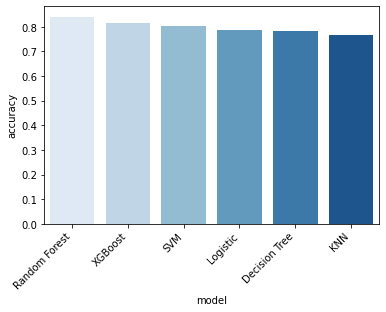

In [345]:
# Plotting and comparing the accuracy of each model
Logistic = sklearn.metrics.accuracy_score(y_val,log_val_pred)
SVM = sklearn.metrics.accuracy_score(y_val,svc_val_pred)  
DecisionTree = sklearn.metrics.accuracy_score(y_val,dt_val_pred)
RandomForest = sklearn.metrics.accuracy_score(y_val,rf_val_pred)
XGBoost = sklearn.metrics.accuracy_score(y_val,xgb_val_pred)
KNN = sklearn.metrics.accuracy_score(y_val,knn_val_pred)

accuracy = pd.DataFrame({'model':['Logistic','SVM','Decision Tree','Random Forest','XGBoost','KNN'],
                         'accuracy':[Logistic, SVM, DecisionTree, RandomForest, XGBoost, KNN]})

sns.barplot(data=accuracy.sort_values(by='accuracy',ascending=False), x='model', y='accuracy',palette='Blues')
# There is no title to this graph as I would need to rerun the SVC model to add it up, sorry for the incovenience
# plt.title('Comparison of the Accuracy of each model')
plt.xticks(rotation=45,ha='right')
plt.show();

Overall, the models show an accuracy between 75% and 84%. The KNN is the least accurate and the random forest is the most accurate so far. The SVM shows a good accuracy, however, for time and computational purposes we won't be focusing on this model for further analysis. The following confusion matrix will complement the accuracy score of the models in order to choose which models to focus on in the next chapter - between the Random Forest, XGBoost, Decision Tree and Logistic Regression.

**2 - Confusion Matrix**

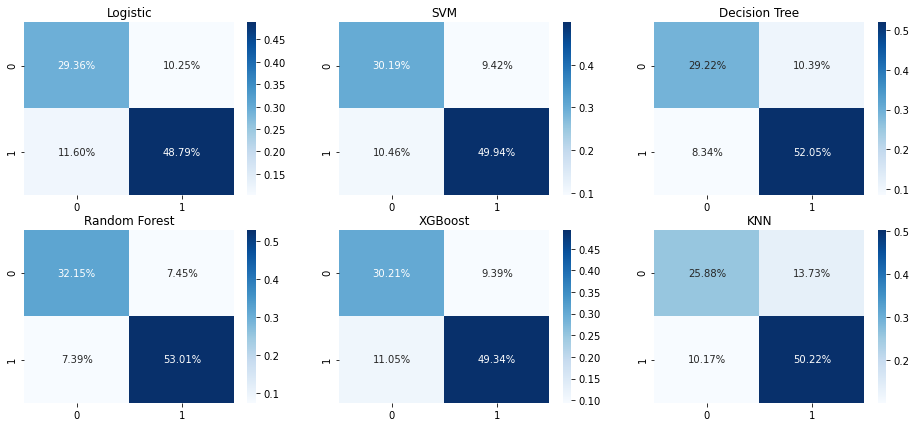

In [71]:
# Setting figure to compare the confusion matrix of each model based on heatmaps
plt.figure(figsize=(16,7))

# Logistic model confusion matrix heatmap
plt.subplot(2,3,1)
sns.heatmap(confusion_matrix(y_val,log_val_pred)/np.sum(confusion_matrix(y_val,log_val_pred)), annot=True, fmt='.2%',cmap='Blues')
plt.title('Logistic')

# SVM model confusion matrix heatmap
plt.subplot(2,3,2)
sns.heatmap(confusion_matrix(y_val,svc_val_pred)/np.sum(confusion_matrix(y_val,svc_val_pred)), annot=True, fmt='.2%',cmap='Blues')
plt.title('SVM')

# Decision Tree confusion matrix heatmap
plt.subplot(2,3,3)
sns.heatmap(confusion_matrix(y_val,dt_val_pred)/np.sum(confusion_matrix(y_val,dt_val_pred)), annot=True, fmt='.2%',cmap='Blues')
plt.title('Decision Tree')

# Random Forest confusion matrix heatmap
plt.subplot(2,3,4)
sns.heatmap(confusion_matrix(y_val,rf_val_pred)/np.sum(confusion_matrix(y_val,rf_val_pred)), annot=True, fmt='.2%',cmap='Blues')
plt.title('Random Forest')

# XGBoost confusion matrix heatmap
plt.subplot(2,3,5)
sns.heatmap(confusion_matrix(y_val,xgb_val_pred)/np.sum(confusion_matrix(y_val,xgb_val_pred)), annot=True, fmt='.2%',cmap='Blues')
plt.title('XGBoost')

# KNN confusion matrix heatmap
plt.subplot(2,3,6)
sns.heatmap(confusion_matrix(y_val,knn_val_pred)/np.sum(confusion_matrix(y_val,knn_val_pred)), annot=True, fmt='.2%',cmap='Blues')
plt.title('KNN')

plt.show();

Note that in our context, a False Positive indicates that the model predicted that a campaign would be successful while in reality it is a failure. As a result, here a FP is far more 'dangerous' than a TP. Among the 4 models we stated above, the Decision Tree has the highest rate of FP, while the Logistic Regression shows the highest FN. Let's analyse further with a ROC Curve.

**3 - ROC Curve**

In [350]:
from sklearn.metrics import roc_curve

# Defining the ROC curve of each model
fpr_log, tpr_log, thresholds_log = roc_curve(log_val_pred, y_val)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(svc_val_pred, y_val)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(dt_val_pred, y_val)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(rf_val_pred, y_val)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(xgb_val_pred, y_val)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(knn_val_pred, y_val)

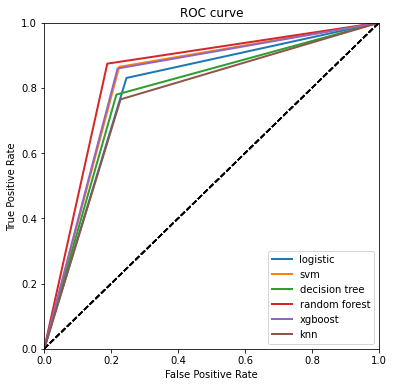

In [351]:
# Setting up the same figure for each plot
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')

# Plotting the ROC Curve of each model on the same graph
fig = plt.figure(figsize=(6,6))
plot_roc_curve(fpr_log, tpr_log, label='logistic')
plot_roc_curve(fpr_svm, tpr_svm, label='svm')
plot_roc_curve(fpr_dt, tpr_dt, label='decision tree')
plot_roc_curve(fpr_rf, tpr_rf, label='random forest')
plot_roc_curve(fpr_xgb, tpr_xgb, label='xgboost')
plot_roc_curve(fpr_knn, tpr_knn, label='knn')
plt.legend(loc="lower right")
plt.show();

The ROC Curve shows the trade-off between the True Positive Rate (sensitivity) and the False Positive Rate (accuracy). Here we can see that the DT and KNN are the most balanced since they are perfectly axed in the diagonal. On the other hand, the other models show a better False Positive Rate than True Positive Rate. 

While the Logistic Regression has a lower TP Rate, we will continue with the Decision Tree to see if we manage to reprieve it from overfitting. The next section will hence focus on : DT, RF, and XGBoost.

### Section 4.2: <a class="anchor" id="section_4_2"></a> Model Fine Tuning

#### 1 - Feature importance

**Decision Tree**

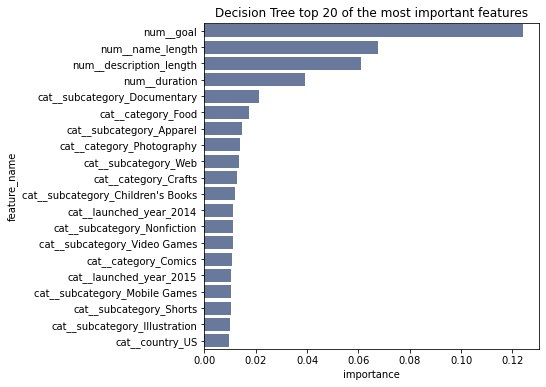

In [352]:
# Get features names (they have been broken down in the pipeline with the One Hot Encoding)
feature_names = dt[:1].get_feature_names_out()

# get importance
importance = dt['model'].feature_importances_

# Make a DataFrame by mapping the 2 arrays on the index
dt_feature_importance = pd.DataFrame(importance,feature_names)

# Reset the index and the sort the dataframe by importance
dt_feature_importance = dt_feature_importance.reset_index().rename(columns={'index': 'feature_name', 0 : 'importance'}).sort_values(by='importance',ascending=False).head(20)

# Plot the top 20 most important features
plt.figure(figsize=(6,6))
sns.barplot(data=dt_feature_importance,x='importance',y='feature_name',color='#6076A3')
plt.title('Decision Tree top 20 of the most important features')
plt.show();

Selecting important features

In [9]:
# Selecting categorical columns
dt_categorical_cols = ["category","subcategory","launched_year"]
# Selecting numerical columns
dt_numerical_cols = ["duration","goal","name_length","description_length"]

# Preprocessing for categorical data
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Preprocessing for numerical data
sc = StandardScaler()

# Bundle preprocessing for numerical and categorical data
dt_preprocessor = ColumnTransformer(
    transformers=[
        ('num', sc, dt_numerical_cols),
        ('cat', encoder, dt_categorical_cols)
    ])

In [10]:
# Setting up the model
dtc2 = DecisionTreeClassifier(criterion='entropy')
dt2 = Pipeline(steps=[('preprocessor', dt_preprocessor),
                      ('model', dtc2)
])

dt2.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration', 'goal',
                                                   'name_length',
                                                   'description_length']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['category', 'subcategory',
                                                   'launched_year'])])),
                ('model', DecisionTreeClassifier(criterion='entropy'))])

In [11]:
# Measuring accuracy of the model with the training score and the validation score
dt2_val_pred = dt2.predict(X_val)

score = sklearn.metrics.accuracy_score(y_val,dt2_val_pred)
print('Validation score: ' + str(score))

Validation score: 0.7666860973477121


**Random Forest**

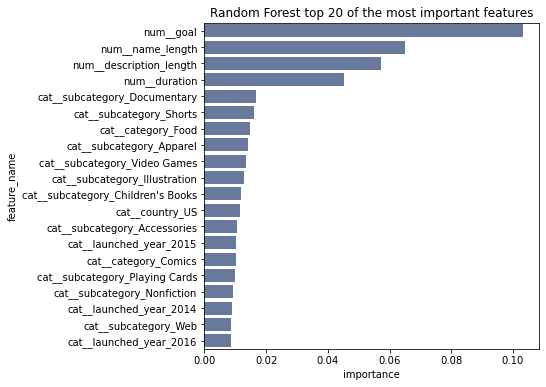

In [357]:
# Get features names (they have been broken down in the pipeline with the One Hot Encoding)
feature_names = rf[:1].get_feature_names_out()

# get importance
importance = rf['model'].feature_importances_

# Make a DataFrame by mapping the 2 arrays on the index
rf_feature_importance = pd.DataFrame(importance,feature_names)

# Reset the index and the sort the dataframe by importance
rf_feature_importance = rf_feature_importance.reset_index().rename(columns={'index': 'feature_name', 0 : 'importance'}).sort_values(by='importance',ascending=False).head(20)

# Plot the top 20 most important features
plt.figure(figsize=(6,6))
sns.barplot(data=rf_feature_importance,x='importance',y='feature_name',color='#6076A3')
plt.title('Random Forest top 20 of the most important features')
plt.show();

Selecting important features

In [12]:
# Selecting categorical columns
rf_categorical_cols = ["category","subcategory","launched_year"]
# Selecting numerical columns
rf_numerical_cols = ["duration","goal","name_length","description_length"]

# Preprocessing for categorical data
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Preprocessing for numerical data
sc = StandardScaler()

# Bundle preprocessing for numerical and categorical data
rf_preprocessor = ColumnTransformer(
    transformers=[
        ('num', sc, rf_numerical_cols),
        ('cat', encoder, rf_categorical_cols)
    ])

In [13]:
# Setting up the model
rfc2 = RandomForestClassifier()
rf2 = Pipeline(steps=[('preprocessor', rf_preprocessor),
                      ('model', rfc2)
])

rf2.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration', 'goal',
                                                   'name_length',
                                                   'description_length']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['category', 'subcategory',
                                                   'launched_year'])])),
                ('model', RandomForestClassifier())])

In [14]:
# Measuring accuracy of the model with the training score and the validation score
rf2_val_pred = rf2.predict(X_val)

score = sklearn.metrics.accuracy_score(y_val,rf2_val_pred)
print('Validation score: ' + str(score))

Validation score: 0.8267997668318274


**XGBoost**

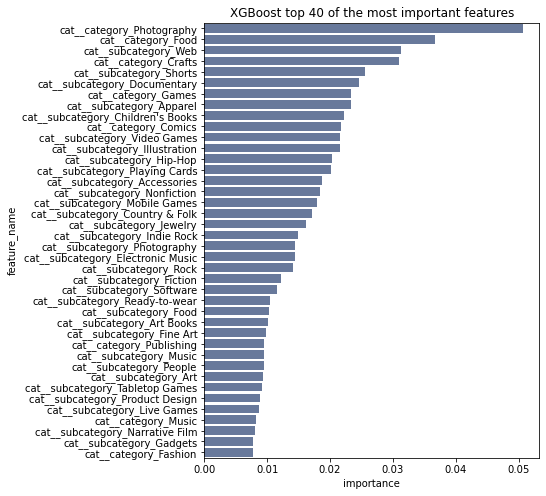

In [365]:
# Get features names (they have been broken down in the pipeline with the One Hot Encoding)
feature_names = xgb[:1].get_feature_names_out()

# get importance
importance = xgb['model_xgb'].feature_importances_

# Make a DataFrame by mapping the 2 arrays on the index
xgb_feature_importance = pd.DataFrame(importance,feature_names)

# Reset the index and the sort the dataframe by importance
xgb_feature_importance = xgb_feature_importance.reset_index().rename(columns={'index': 'feature_name', 0 : 'importance'}).sort_values(by='importance',ascending=False).head(40)

# Plot the top 20 most important features
plt.figure(figsize=(6,8))
sns.barplot(data=xgb_feature_importance,x='importance',y='feature_name',color='#6076A3')
plt.title('XGBoost top 40 of the most important features')
plt.show();

Selecting important features

In [15]:
# Selecting categorical columns
xgb_categorical_cols = ["category","subcategory","launched_year"]
# Selecting numerical columns
xgb_numerical_cols = ["duration","name_length"]

# Preprocessing for categorical data
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Preprocessing for numerical data
sc = StandardScaler()

# Bundle preprocessing for numerical and categorical data
xgb_preprocessor = ColumnTransformer(
    transformers=[
        ('num', sc, xgb_numerical_cols),
        ('cat', encoder, xgb_categorical_cols)
    ])

In [16]:
# Setting up the model
xgbmodel2 = XGBClassifier(n_estimators=100, use_label_encoder=False)
xgb2 = Pipeline(steps=[('preprocessor', xgb_preprocessor),
                      ('model', xgbmodel2)
])

xgb2.fit(X_train,y_train)

[22:38:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration', 'name_length']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['category', 'subcategory',
                                                   'launched_year'])])),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categori...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, miss

In [17]:
# Measuring accuracy of the model with the training score and the validation score
xgb2_val_pred = xgb2.predict(X_val)

score = sklearn.metrics.accuracy_score(y_val,xgb2_val_pred)
print('Validation score: ' + str(score))

Validation score: 0.7955406587000874


Report on feature selection: For the 3 models, performing feature selection does not work well due to the high number of classes for categorical features. As a result, the performance of each of those 3  with feature importance is lower than without. Note that feature selection could potentially be useful in order to save computational power. It is one of the trade offs we can face in a business context for example.

#### 2 - Cross Validation

Since the best model so far is Random Forest, we will try to use cross-validation on it in order to check if the accuracy improves while preventing the model to overfit.

In [46]:
# Random Forest Model
rfc3 = RandomForestClassifier(n_estimators=100)
rf3 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', rfc3)
])

rf3_predicted = cross_val_predict(rf3, X_train, y_train, cv=5)

In [47]:
score = metrics.accuracy_score(y_train, rf3_predicted)
print('Cross Validation Accuracy Score: ', score)

Cross Validation Accuracy Score:  0.8269222010693823


The accuracy on Cross Validation is still lower than without (reference to RF in Stage 1). Now, we will build another ensemble method by combining our initial DT, RF and XGBoost.

#### 3 - VotingClassifier

In [56]:
# Setting up the Voting Classifier
voting_classifier = VotingClassifier(estimators=[('logmodel', logmodel), ('rfc', rfc), ('model_xgb', model_xgb)], voting='hard')
vc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', voting_classifier)
])

# Fitting the model to the train set
vc.fit(X_train, y_train)

[00:00:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration', 'goal',
                                                   'name_length',
                                                   'description_length']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['category', 'subcategory',
                                                   'country', 'launched_day',
                                                   'launched_month',
                                                   'launched_year'])])),
                ('model',
                 VotingClassifier(estimators=[('logmodel',
                                               Logistic...
             

In [57]:
# Measuring accuracy of the model with the validation score
vc_val_pred = vc.predict(X_val)

score = sklearn.metrics.accuracy_score(y_val,vc_val_pred)
print('Validation score: ' + str(score))

Validation score: 0.8205333721946955


### Section 4.3: <a class="anchor" id="section_4_3"></a> Model Testing

The best model so far is the random forest ran in the first stage. We will now use this model to evaluate our predictions on the test set.

In [58]:
# Measuring accuracy of the model with the testing score
rf_predict = rf.predict(X_test)

score = sklearn.metrics.accuracy_score(y_val,vc_val_pred)
print('Testing score: ' + str(score))

Testing score: 0.8205333721946955


# Chapter 5: <a class="anchor" id="chapter5"></a> Summary

We managed to predict the success of a campaign launched on Kickstarter with an accuracy of 82% using a Random Forest. The goal, the name length, the description length and the duration have emerged as the most important features. However, this might be the case only because these are numerical variables. XGBoost on the other hand highlighted that the most important features were categorical, which echos to the most successful categories and subcategories that we analysed in the EDA. Nonetheless, it is sensible to think that the most important feature is the amount requested (goal).

The models face some important limitations, however the biggest limitation comes from the data itself. Indeed, the itirations are very similar one to another which forces the Decision Tree and the Random Forest to overfit the training data. Other fine tuning models have been used to try to counter this effect such as Randomized Search, and even there, the provided hyperparameters were overfitting the training data. Moreover, note there is no random state on any model here which enabled each model to run a couple of times while showing the same results. This proves again that the main limitation here is the data rather than the models. As a result, we should expect a drop in accuracy when testing the Random Forest model on new incoming data.

Some further steps could be considered to improve the accuracy and the robust of the model, such as adding streaming data to the dataset. Another idea would be to add a Natural Language Processing dimension in the modelling section, such as a sentiment analysis of the title or the description of the campaign.

# Chapter 6: <a class="anchor" id="chapter6"></a> References

Web Scraping Service. 2022. Kickstarter Datasets. Available at: <https://webrobots.io/kickstarter-datasets/>